In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from tpot import TPOTClassifier  # tpot
from xgboost import XGBClassifier # xgboost
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # 决策树
from sklearn.ensemble import  AdaBoostClassifier # AdaBoost
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 标准化，最大最小归一化
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA线性判别式分析
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #高斯贝叶斯/多项式贝叶斯/伯努利贝叶斯 

In [2]:
from sklearn.model_selection import train_test_split

# 1 加载数据集

文档中字段的含义：

---
|     字段    	|       含义      	|                       Key                      	|
|:-----------:	|:---------------:	|:----------------------------------------------:	|
| Passengerld 	|     乘客编号    	|                                                	|
|   Survived  	|     存活与否    	|                 0 = No, 1 = Yes                	|
|    Pclass   	|     船票等级    	|         class 1 = 1st, 2 = 2nd, 3 = 3rd        	|
|     Name    	|     乘客姓名    	|                                                	|
|     Sex     	|       性别      	|                                                	|
|     Age     	|       年龄      	|                                                	|
|    Sibsp    	| 乘客兄妹 / 配偶 	|                                                	|
|    Parch    	| 乘客父母 / 子女 	|                                                	|
|    Ticket   	|     船票号码    	|                                                	|
|     Fare    	|     船票价格    	|                                                	|
|    Cabin    	|      船舱号     	|                                                	|
|   Embarked  	|     登船港口    	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

---

In [3]:
train_df = pd.read_csv('./data/TITANIC_train.csv')
test_df = pd.read_csv('./data/TITANIC_test.csv')

## 1.1 查看数据信息：列名、非空个数、类型等

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


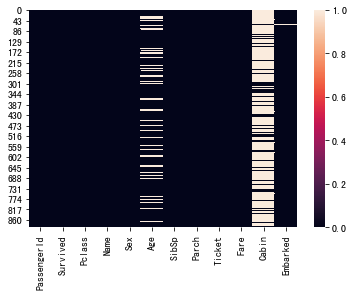

In [6]:
# 缺失值热力图可视化
sns.heatmap(train_df.isnull())
plt.show()

年龄Age和船舱Cabin存在较多缺失值，登陆港口Embarked也存在少量空值

## 1.2 查看数据摘要

### 1.2.1  数值型特征的摘要

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df['PassengerId'].unique().shape

(891,)

In [10]:
test_df['PassengerId'].unique().shape

(418,)

PassengerId特征只是身份识别，可以删除；也可以作为index。

### 1.2.2 字符型特征的特征分布

In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Herman, Miss. Alice",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Badman, Miss. Emily Louisa",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


可知，Name没有重复值；Sex只有2个两个取值，男性人数最多；Ticket有重复票，可能存在家庭票、团体票的情况；船舱号Cabin也有重复，多人一个船舱，且缺失值较多，考虑是否删除；港口Embarked有3个取值，且最多的是S，同时有2个空值，考虑使用出现频率最高的S填充。

# 2 数据清洗：

## 2.1 合并训练集和测试集

In [13]:
# 用于保存预测结果
test_PassengerId = test_df['PassengerId']

In [14]:
# 用于指定 合并训练集和测试集后 再拆分时进行切片的终止点
train_length = train_df.shape[0]

In [15]:
target = train_df['Survived']

In [16]:
df_all = pd.concat((train_df.drop(columns='Survived'), test_df), axis=0).reset_index(drop=True)
df_all

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 2.2 处理缺失值

In [17]:
df_all.isnull().sum(axis=0)

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 2.2.1 Fare有一个缺失值——衍生特征FamilySize、UnitFare、TeamTicket
使用对应Pclass下的均值进行填充

可能存在团体票，所以要看下

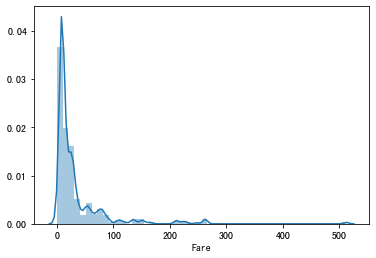

In [18]:
sns.distplot(df_all['Fare'])

多数在0-100之间。下面先探索下船票价格是否能通过家庭成员人数得到

In [19]:
# SibSp 乘客兄妹 / 配偶; Parch 父母/子女 还有自己
# 衍生特征FamilySize家庭成员人数
df_all['FamilySize'] = df_all['SibSp'] + df_all['Parch'] + 1

In [20]:
df_all['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [21]:
df_all[df_all['FamilySize'] > 0][['FamilySize', 'Fare']]

,FamilySize,Fare
0,2,7.2500
1,2,71.2833
2,1,7.9250
3,2,53.1000
4,1,8.0500
...,...,...
1304,1,8.0500
1305,1,108.9000
1306,1,7.2500
1307,1,8.0500


成员人数相同，票价差距很大，所以家庭成员人数和船票间不是完全线性相关。

In [22]:
# 找相同票号的船票
tickes = df_all['Ticket'].value_counts()

In [23]:
tickes

CA. 2343      11
1601           8
CA 2144        8
3101295        7
347082         7
              ..
9234           1
A/5. 2151      1
347083         1
C.A. 34260     1
237249         1
Name: Ticket, Length: 929, dtype: int64

In [24]:
# 一共有216张票存在多人共用
tickes[tickes > 1].describe()

count    216.000000
mean       2.759259
std        1.352829
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Ticket, dtype: float64

In [25]:
# 统计每个票号对应的团队票数
df_all['TeamTicket'] = df_all['Ticket'].map(tickes.to_dict())

In [26]:
df_all.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TeamTicket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2


In [27]:
# 衍生特征UnitFare单位船价
df_all['UnitFare'] = df_all['Fare'] / df_all['TeamTicket']

In [28]:
df_all.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TeamTicket,UnitFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.25000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,35.64165


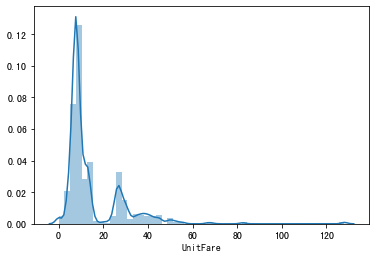

In [29]:
sns.distplot(df_all['UnitFare'])

In [30]:
# 不同船票等级价格应该不同，所以统计下不同船票等级下的船票单价的均值
average_in_Pclass = df_all.groupby(by='Pclass')['UnitFare'].agg('mean')
average_in_Pclass

Pclass
1    33.910500
2    11.411010
3     7.329146
Name: UnitFare, dtype: float64

In [31]:
df_all.groupby(by='Pclass')['Fare'].agg('mean')

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [32]:
pclass = df_all[df_all['Fare'].isnull()]['Pclass'].values[0]
pclass

3

In [33]:
average_in_Pclass[pclass]

7.329145550847469

In [34]:
df_all['UnitFare'].fillna(average_in_Pclass[pclass], inplace=True)

In [35]:
df_all = df_all.drop(columns=['Fare', 'Ticket'])

### 2.2.2 Embarked有2个缺失值，使用频率最高的值S填充

In [36]:
df_all['Embarked'].fillna('S', inplace=True)

### 2.2.3  Cabin缺失值过多，drop该特征

In [37]:
df_all = df_all.drop(columns=['Cabin'])

In [38]:
df_all.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Embarked       False
FamilySize     False
TeamTicket     False
UnitFare       False
dtype: bool

### 2.2.4 Age字段缺失值使用均值填充

In [39]:
df_all['Age'].fillna(df_all['Age'].mean(), inplace=True)

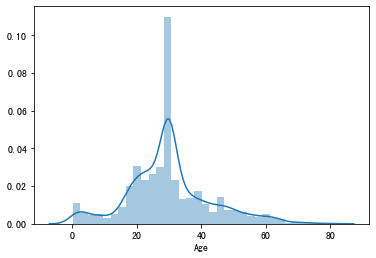

In [40]:
sns.distplot(df_all['Age'])
plt.show()

## 2.3 字符类特征预处理

### 2.3.1 Name字段——衍生Title字段

In [41]:
df_all['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

名称中间部分是称呼，比如Mr Miss，Master等；通过正则表达式，提取出称呼列

In [42]:
df_all['Name'].str.extract(r" ([A-Za-z]+)\.", expand=False)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [43]:
# 将识别到的头衔保存为title列
df_all['Title'] = df_all['Name'].str.extract(r" ([A-Za-z]+)\.", expand=False)

In [44]:
df_all.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamilySize,TeamTicket,UnitFare,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,1,7.25,Mr


In [45]:
df_all[df_all['Title'] == 'Jonkheer']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamilySize,TeamTicket,UnitFare,Title
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,S,1,1,0.0,Jonkheer


In [46]:
df_all['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Jonkheer      1
Don           1
Mme           1
Countess      1
Dona          1
Capt          1
Sir           1
Name: Title, dtype: int64

通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了如社会地位等的称呼，如：Dr,、Lady、Major、Master等的称呼。因此将Name字段中的称呼提取到了Title字段中。

Major:陆军少校，Capt: captain(上尉)，Col:colonel(少校)，Jonkheer:乡绅，Don:用于修饰西班牙或葡萄牙裔王孙贵胄，Dr：doctor(医生)，Master:相当于汉语的"少爷"，Rev:牧师/神父，the Countess:伯爵夫人。 

进一步归类：

In [47]:
map_dict = {}
# 士兵、军人、牧师
map_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Soldiers'))  
# 有地位的王孙贵胄
map_dict.update(dict.fromkeys(['Don', 'Sir', 'Countess', 'Dona', 'Lady', 'Jonkheer'], 'Royalty'))  
# 已婚女士
map_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
# 未婚女士
map_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
# 少爷
map_dict.update(dict.fromkeys(['Master'], 'Master'))
map_dict.update(dict.fromkeys(['Mr'], 'Mr'))
# map_dict

In [48]:
df_all['Title'] = df_all['Title'].map(map_dict)

In [49]:
df_all['Title'].value_counts()

Mr          757
Miss        262
Mrs         200
Master       61
Soldiers     23
Royalty       6
Name: Title, dtype: int64

In [50]:
df_all = df_all.drop(columns=['Name'])

In [51]:
df_all.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,TeamTicket,UnitFare,Title
0,1,3,male,22.0,1,0,S,2,1,7.25,Mr


### 2.3.2 数值化——one-hot编码

In [52]:
df_all_ = pd.get_dummies(df_all)

In [53]:
df_all_.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,FamilySize,TeamTicket,UnitFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_Soldiers
0,1,3,22.0,1,0,2,1,7.25000,0,1,0,0,1,0,0,1,0,0,0
1,2,1,38.0,1,0,2,2,35.64165,1,0,1,0,0,0,0,0,1,0,0


二分类的特征one-hot后，只保留一列即可

In [54]:
df_all_ = df_all_.drop(columns=['Sex_male'])

## 2.4 恢复训练集和测试集

In [55]:
X_train = df_all_.iloc[:train_length]
x_test = df_all_.iloc[train_length:]

In [56]:
X_train.tail(1)

,PassengerId,Pclass,Age,SibSp,Parch,FamilySize,TeamTicket,UnitFare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_Soldiers
890,891,3,32.0,0,0,1,1,7.75,0,0,1,0,0,0,1,0,0,0


In [57]:
x_test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,FamilySize,TeamTicket,UnitFare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_Soldiers
891,892,3,34.5,0,0,1,1,7.8292,0,0,1,0,0,0,1,0,0,0


与1.2.1校验PassengerId可知，训练集和测试集已拆分好了

In [58]:
X_train = X_train.drop(columns=['PassengerId'])
x_test = x_test.drop(columns=['PassengerId'])

## 2.5 相关系数可视化

In [59]:
X_train['Survived'] = target
X_train.head(1)

,Pclass,Age,SibSp,Parch,FamilySize,TeamTicket,UnitFare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_Soldiers,Survived
0,3,22.0,1,0,2,1,7.25,0,0,0,1,0,0,1,0,0,0,0


In [60]:
corr_df = X_train.iloc[:, 1:].corr()

In [61]:
abs_corr = corr_df['Survived'].apply(abs).sort_values()
abs_corr

Embarked_Q        0.003650
FamilySize        0.016639
Title_Soldiers    0.031316
Title_Royalty     0.033391
SibSp             0.035322
TeamTicket        0.064962
Age               0.070323
Parch             0.081629
Title_Master      0.085221
Embarked_S        0.149683
Embarked_C        0.168240
UnitFare          0.288337
Title_Miss        0.332795
Title_Mrs         0.344935
Sex_female        0.543351
Title_Mr          0.549199
Survived          1.000000
Name: Survived, dtype: float64

In [62]:
corr_df = corr_df.loc[abs_corr.index]

In [63]:
corr_df = corr_df.loc[:, abs_corr.index[::-1]]

In [64]:
corr_df.tail(2)

,Survived,Title_Mr,Sex_female,Title_Mrs,Title_Miss,UnitFare,Embarked_C,Embarked_S,Title_Master,Parch,Age,TeamTicket,SibSp,Title_Royalty,Title_Soldiers,FamilySize,Embarked_Q
Title_Mr,-0.549199,1.000000,-0.867334,-0.479363,-0.599803,-0.095604,-0.072567,0.112870,-0.254903,-0.333905,0.186416,-0.288334,-0.250489,-0.088324,-0.168826,-0.338014,-0.078338
Survived,1.000000,-0.549199,0.543351,0.344935,0.332795,0.288337,0.168240,-0.149683,0.085221,0.081629,-0.070323,0.064962,-0.035322,0.033391,-0.031316,0.016639,0.003650


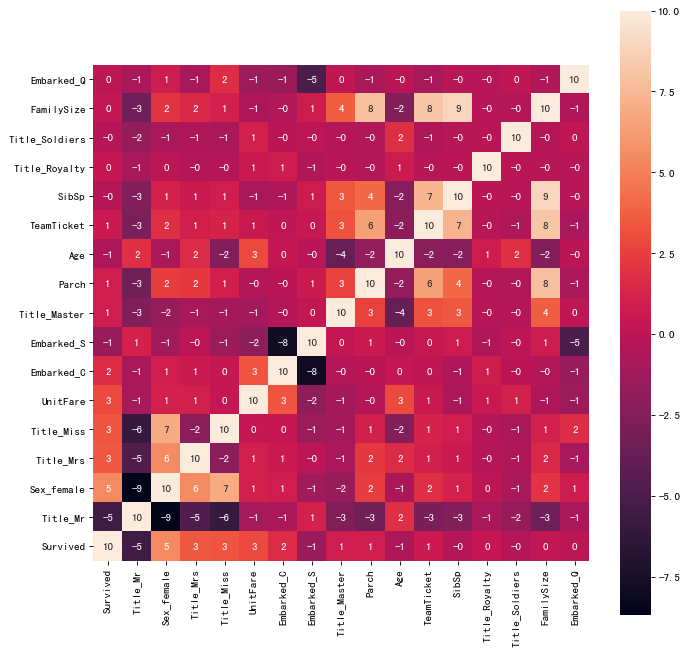

In [65]:
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(corr_df * 10, annot=True, square=True, fmt='.0f')
plt.savefig(fname='./TitanicFeatureCorr.png')
plt.show()

drop与Survived相关性最小的特征Embarked_Q后，准确率均下降，其中LR的准确率下降最多，有4个百分点，因此保留该特征。    

**与目标值相关系数最小的特征，并不一定是完全无用的特征。之前理解有误区**

In [66]:
# X_train = X_train.drop(columns=['Embarked_Q', 'Survived'])
X_train = X_train.drop(columns=['Survived'])
# x_test = x_test.drop(columns=['Embarked_Q'])

## 2.6 无量纲化处理

In [67]:
# transfer = StandardScaler()
# X_train = transfer.fit_transform(X_train.values)
# x_test = transfer.transform(x_test.values)

In [68]:
transfer = MinMaxScaler()
X_train = transfer.fit_transform(X_train.values)
x_test = transfer.transform(x_test.values)

# 3 拆分数据集

In [69]:
x_train, x_val, y_train, y_val = train_test_split(X_train, target, test_size=0.3, random_state=11)

In [70]:
x_train.shape, x_val.shape

((623, 17), (268, 17))

# 4 建模

## 4.1 朴素贝叶斯3模型

从相关系数矩阵可以看出，几乎完全独立的特征只有2个(Title_Royalty、Title_Soldiers)，而朴素贝叶斯的前提是假设特征之间独立，先使用朴素贝叶斯模型预测验证下.

In [71]:
model_funcs = [GaussianNB, BernoulliNB, MultinomialNB]

In [72]:
for model in model_funcs:
    m = model()
    m.fit(x_train, y_train)
    print(f"{model}的准确率:\n", accuracy_score(y_val, m.predict(x_val)))
    print("-" * 100)

<class 'sklearn.naive_bayes.GaussianNB'>的准确率:
 0.8582089552238806
----------------------------------------------------------------------------------------------------
<class 'sklearn.naive_bayes.BernoulliNB'>的准确率:
 0.832089552238806
----------------------------------------------------------------------------------------------------
<class 'sklearn.naive_bayes.MultinomialNB'>的准确率:
 0.8283582089552238
----------------------------------------------------------------------------------------------------


- **小结**：
    1. MultinomialNB多项式贝叶斯的输入不能是负值，否则报ValueError；
    2. StandardScaler标准化处理会有负值特征；
    3. 在该数据集上，通过StandardScaler标准化进行无量纲化后的预测结果，不如MinMaxScaler最大最小归一化的效果；
    4. 可以看到高斯贝叶斯的预测准确率最高，原因应该和特征之间线性相关较多有关。

## 4.2 KNN在二分类上的效果：
猜测k=2的时候，knn模型效果会不好的可能性大

In [73]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print(f"{knn}的准确率:\n", accuracy_score(y_val, knn.predict(x_val)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')的准确率:
 0.8059701492537313


果然如猜测，knn的表现不佳，比高斯贝叶斯还低。

## 4.3 逻辑回归的效果：
逻辑回归是将线性输入经过sigmoid计算后转为分类。根据相关系数矩阵，可知，多个特征存在线性关系，且逻辑回归在二分类问题上常表现不错，因此猜测逻辑回归模型的预测结果应该会比前面模型表现好。

In [74]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
print(f"{LR}的准确率:\n", accuracy_score(y_val, LR.predict(x_val)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)的准确率:
 0.8768656716417911


比高斯贝叶斯高

In [117]:
LR_pred = LR.predict(x_test)

In [118]:
# sample = pd.DataFrame() 
# sample['PassengerId'] = test_PassengerId
# sample['Survived'] = LR_pred
# sample.to_csv("./data/Titanic_sample_LR.csv", index=False)

kaggle分数：0.7799

## 4.4 随机森林RF的效果：
随机有放回的抽样，通过多棵树的分类结果进行投票，不容易过拟合，看下分类效果

In [77]:
# gini 0.8395522388059702
# entropy 0.835820895522388
RF = RandomForestClassifier(criterion='gini', n_estimators=100)
RF.fit(x_train, y_train)
print(f"{RF}的准确率:\n", accuracy_score(y_val, RF.predict(x_val)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)的准确率:
 0.8208955223880597


In [79]:
for i in [50, 100, 120, 200, 300, 500]:
    RF = RandomForestClassifier(criterion='gini',
                               n_estimators=i)
    RF.fit(x_train, y_train)
    print(f"{RF}的准确率:\n", accuracy_score(y_val, RF.predict(x_val)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)的准确率:
 0.8097014925373134
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
      

随机森林CART和ID3决策树得到的准确率在不同n_estimators下，有时非常相近，有时相差较大，还需要根据实际情况检验。

## 4.5 Adaboost的效果
以决策树作为弱分类器

In [116]:
estimator = DecisionTreeClassifier(max_depth=1)
adaboostgini = AdaBoostClassifier(base_estimator=estimator,  # 弱学习器的基本分类器
                              n_estimators=100, # 最迭代次数
                              learning_rate=0.1) # 权值以该比例缩减
adaboostgini.fit(x_train,  y_train)
print(f"{adaboostgini}的准确率:\n", accuracy_score(y_val, adaboostgini.predict(x_val)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [115]:
estimator = DecisionTreeClassifier(max_depth=1, criterion='entropy')
adaboost_etp = AdaBoostClassifier(base_estimator=estimator,  # 弱学习器的基本分类器
                              n_estimators=100, # 最迭代次数
                              learning_rate=0.1) # 权值以该比例缩减
adaboost_etp.fit(x_train,  y_train)
print(f"{adaboost_etp}的准确率:\n", accuracy_score(y_val, adaboost_etp.predict(x_val)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [103]:
estimator = DecisionTreeClassifier(max_depth=5, criterion='entropy')
adaboost = AdaBoostClassifier(base_estimator=estimator,  # 弱学习器的基本分类器
                              n_estimators=300, # 最迭代次数
                              learning_rate=0.001) # 权值以该比例缩减
adaboost.fit(x_train,  y_train)
print(f"{adaboost}的准确率:\n", accuracy_score(y_val, adaboost.predict(x_val)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

使用还不够熟练

## 4.6 LinearDiscriminantAnalysis的效果

In [120]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)
print(f"{lda}的准确率:\n", accuracy_score(y_val, lda.predict(x_val)))

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)的准确率:
 0.8694029850746269


之前一直认为它是降维的API，其实它也可以做分类，效果也可以。

## 4.7 XGBClassifier的效果：

In [122]:
xgbc = XGBClassifier()
xgbc.fit(x_train,  y_train)
print(f"{xgbc}的准确率:\n", accuracy_score(y_val, xgbc.predict(x_val)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)的准确率:
 0.8208955223880597


In [123]:
xgbc.feature_importances_

array([0.12991993, 0.0139328 , 0.00960798, 0.01649052, 0.00929235,
       0.03515088, 0.01570167, 0.01747121, 0.01253997, 0.01982569,
       0.01080612, 0.0059594 , 0.01177324, 0.49919507, 0.00503234,
       0.02387569, 0.16342509], dtype=float32)

In [124]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameters = {"max_depth": [1, 3, 5, 7, 9],
              'n_estimators': [50, 100, 150, 200],
              "learning_rate": [0.1, 0.01, 0.05, 0.001]
             }
clf = XGBClassifier()
grid_cv = GridSearchCV(estimator=clf, 
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=5
                      )
grid_cv.fit(x_train,  y_train)
print("grid_cv的最佳得分:\n", grid_cv.best_score_)
print("grid_cv的最佳参数:\n", grid_cv.best_params_)

grid_cv的最佳得分:
 0.8346451612903225
grid_cv的最佳参数:
 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


In [127]:
clf = XGBClassifier(max_depth=3, n_estimators=150, learning_rate=0.05)
clf.fit(x_train, y_train)
print(f"{clf}的准确率:\n", accuracy_score(y_val, clf.predict(x_val)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)的准确率:
 0.8694029850746269


In [128]:
clfxgb = XGBClassifier(max_depth=3, n_estimators=150, learning_rate=0.05)
clfxgb.fit(X_train, target.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
accuracy_score(target.values, clfxgb.predict(X_train))

0.8810325476992144

In [130]:
# xgb_pred = clfxgb.predict(x_test)
# sample = pd.DataFrame() 
# sample['PassengerId'] = test_PassengerId
# sample['Survived'] = xgb_pred
# sample.to_csv("./data/Titanic_sample_xgb.csv", index=False)

kaggle分数：0.74162

## 4.8 TPOT模型

In [138]:
model = TPOTClassifier(
    generations=5,   # 运行管道优化过程的迭代次数
    population_size=20,   # 在遗传进化中每一代要保留的个体数量
    verbosity=2,   # TPOT运行时能传递多少信息
)

In [140]:
model.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.8297806451612904
Generation 2 - Current best internal CV score: 0.8297806451612904
Generation 3 - Current best internal CV score: 0.8346193548387097
Generation 4 - Current best internal CV score: 0.8410193548387097
Generation 5 - Current best internal CV score: 0.8410193548387097
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=3, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x7fb4de0caf10>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [141]:
model.score(x_val, y_val)

0.8619402985074627

In [143]:
# model.export(output_file_name='', data_file_path='')
model.export('titanic_tpot_pipeline.py')

In [144]:
# sample = pd.DataFrame() 
# sample['PassengerId'] = test_PassengerId
# sample['Survived'] = model.predict(x_test)
# sample.to_csv("./data/Titanic_sample_tpot.csv", index=False)

kaggle分数=0.75598